## Prepare SNLI and Contrast Data

In [21]:
import datasets
dataset = datasets.load_dataset('snli')
dataset


/home/menghao_yang/miniconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 550152
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 10000
    })
})

The original training dataset size around 550,152
The original validation dataset size around 10,000

In [31]:
import pandas as pd
data=pd.read_csv('LIT_auto-gen-contrast-set/generate/snli_aug/train.tsv',sep='\t')
data2 =  data[data['captionID']!='original' ].reset_index()
data3 = data2[ ['sentence1','sentence2','gold_label','captionID'] ]
labelMap = {'entailment': 0, 'neutral': 1, 'contradiction': 2}
data4 = data3.replace({"gold_label": labelMap})
contrast_train = data4.rename(columns={'sentence1': 'premise', 'sentence2': 'hypothesis', 'gold_label': 'label', 'captionID': 'type'})
contrast_train

,premise,hypothesis,label,type
0,It is a man who is lying on an air mattress.,It is the man which is asleep.,1,*;it cleft: ARG1;it cleft: ARG1
1,Her wind instrument is played by a woman along...,A band is belonged to by the woman.,1,*;passive: ARG2;passive: ARG2
2,It is a woman who plays her wind instrument al...,It is the woman who belongs to a band.,1,*;it cleft: ARG1;it cleft: ARG1
3,A girl with a ponytail in a black soccer unifo...,A player will get ready to kick the ball.,1,entailment;past simple;future simple
4,A girl with a ponytail in a black soccer unifo...,A player gets ready to kick the ball.,1,entailment;may;original
...,...,...,...,...
189109,Children may play in a water fountain.,The children may be wet.,1,entailment;may;may
189110,It is children who play in a water fountain.,It is the children who are wet.,0,*;it cleft: ARG1;it cleft: ARG1
189111,These may be very well groomed animals.,The animal's fur looked well kept,1,entailment;may;original
189112,These may be very well groomed animals.,The animal's fur may look well-kept.,1,entailment;may;may


In [32]:
output_path = "contrast/train.jsonl"

with open(output_path, "w") as f:
    f.write(contrast_train.to_json(orient='records', lines=True))

In [33]:
data=pd.read_csv('LIT_auto-gen-contrast-set/generate/snli_aug/validation.tsv',sep='\t')
data2 =  data[data['captionID']!='original' ].reset_index()
data3 = data2[ ['sentence1','sentence2','gold_label','captionID'] ]
data4 = data3.replace({"gold_label": labelMap})
contrast_eval = data4.rename(columns={'sentence1': 'premise', 'sentence2': 'hypothesis', 'gold_label': 'label', 'captionID': 'type'})
contrast_eval

,premise,hypothesis,label,type
0,As people walk by it is a woman who is eating ...,It is a woman who is eating lunch while on her...,1,*;it cleft: ARG1;it cleft: ARG1
1,It is the pitcher wearing black who heaves the...,It is the Yankees who are at practice.,1,*;it cleft: ARG1;it cleft: ARG1
2,A group of Chinese people may be relaxing in t...,A group of Americans are in water.,1,contradiction;may;original
3,A group of Chinese people may be relaxing in t...,A group of Americans may be in water.,1,contradiction;may;may
4,It is a group of Chinese people who is relaxin...,It is a group of Americans which is in water.,2,*;it cleft: ARG1;it cleft: ARG1
...,...,...,...,...
4199,A woman may observe an antique car rusted.,A woman may look at an old car.,1,entailment;may;may
4200,A rusted antique car is observed by a woman.,An old car is looked at by a woman.,0,*;passive: ARG2;passive: ARG2
4201,It is a woman who observes an antique car rusted.,It is a woman who looks at an old car.,0,*;it cleft: ARG1;it cleft: ARG1
4202,It is a woman who observed an antique car rusted.,It is a woman who will look at an old car.,1,entailment;past simple+it cleft: ARG1;future s...


In [34]:
output_path = "contrast/validation.jsonl"

with open(output_path, "w") as f:
    f.write(contrast_eval.to_json(orient='records', lines=True))

The contrast training dataset size around 189,114
The contrast validation dataset size around 4204

## Running Evaludation on SNLI and Contrast Validation Dataset on Pretrained Model

In [36]:
# python3 run.py --do_eval --task nli --dataset snli --model ./trained_model/checkpoint-pretrain   --output_dir ./eval_output/snli/
# python3 run.py --do_eval --task nli --dataset contrast/validation.jsonl   --model ./trained_model/checkpoint-pretrain   --output_dir ./eval_output/contrast-pretrain/

Evaluation results: <br><br>
SNLI: <br>
{'eval_loss': 0.3796271085739136, 'eval_accuracy': 0.8947368264198303, 'eval_runtime': 15.2123, 'eval_samples_per_second': 646.977, 'eval_steps_per_second': 80.921} <br><br>
Contrast: <br>
{'eval_loss': 2.7356245517730713, 'eval_accuracy': 0.454091340303421, 'eval_runtime': 7.0502, 'eval_samples_per_second': 596.296, 'eval_steps_per_second': 74.608}

### categorize error types and visualize them

In [9]:
input_file = 'eval_output/contrast-pretrain/eval_predictions.jsonl'
with open(input_file) as f:
    lines = f.read().splitlines()

import pandas as pd
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
import json
df_inter['json_element'].apply(json.loads)
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))
df_final


,premise,hypothesis,label,type,predicted_scores,predicted_label
0,As people walk by it is a woman who is eating ...,It is a woman who is eating lunch while on her...,1,*;it cleft: ARG1;it cleft: ARG1,"[-3.2032413482666016, 4.185159683227539, -2.46...",1
1,It is the pitcher wearing black who heaves the...,It is the Yankees who are at practice.,1,*;it cleft: ARG1;it cleft: ARG1,"[-3.423402786254883, 3.7425549030303955, -1.46...",1
2,A group of Chinese people may be relaxing in t...,A group of Americans are in water.,1,contradiction;may;original,"[-3.226867198944092, -1.8127182722091675, 4.68...",2
3,A group of Chinese people may be relaxing in t...,A group of Americans may be in water.,1,contradiction;may;may,"[-3.1548948287963867, -1.7020188570022583, 4.5...",2
4,It is a group of Chinese people who is relaxin...,It is a group of Americans which is in water.,2,*;it cleft: ARG1;it cleft: ARG1,"[-3.3239564895629883, -1.8190501928329468, 4.7...",2
...,...,...,...,...,...,...
4199,A woman may observe an antique car rusted.,A woman may look at an old car.,1,entailment;may;may,"[3.9649386405944824, -1.1308493614196777, -3.8...",0
4200,A rusted antique car is observed by a woman.,An old car is looked at by a woman.,0,*;passive: ARG2;passive: ARG2,"[4.021698474884033, -1.1614381074905396, -3.93...",0
4201,It is a woman who observes an antique car rusted.,It is a woman who looks at an old car.,0,*;it cleft: ARG1;it cleft: ARG1,"[3.7233152389526367, -1.2956809997558594, -3.3...",0
4202,It is a woman who observed an antique car rusted.,It is a woman who will look at an old car.,1,entailment;past simple+it cleft: ARG1;future s...,"[1.4876084327697754, 0.49785634875297546, -2.1...",0


In [13]:
df_error = df_final.loc[df_final['label'] != df_final['predicted_label']].reset_index(drop=True)
df_error

,premise,hypothesis,label,type,predicted_scores,predicted_label
0,A group of Chinese people may be relaxing in t...,A group of Americans are in water.,1,contradiction;may;original,"[-3.226867198944092, -1.8127182722091675, 4.68...",2
1,A group of Chinese people may be relaxing in t...,A group of Americans may be in water.,1,contradiction;may;may,"[-3.1548948287963867, -1.7020188570022583, 4.5...",2
2,Musicians may be performing on stage.,A clown is juggling balls at a circus.,1,contradiction;may;original,"[-4.4963226318359375, -2.257486581802368, 6.01...",2
3,Musicians may be performing on stage.,A clown may be juggling balls at a circus.,1,contradiction;may;may,"[-4.706264495849609, -1.9266306161880493, 5.92...",2
4,A large black dog and a brown small dog may be...,The dogs are playing in the yard.,1,contradiction;may;original,"[-2.8921656608581543, -1.4484851360321045, 4.1...",2
...,...,...,...,...,...,...
2290,A woman observed an antique car rusted.,A woman will look at an old car.,1,entailment;past simple;future simple,"[2.9630069732666016, -0.8250805735588074, -2.5...",0
2291,A woman may observe an antique car rusted.,A woman looks at an old car.,1,entailment;may;original,"[4.0294108390808105, -1.0754663944244385, -4.0...",0
2292,A woman may observe an antique car rusted.,A woman may look at an old car.,1,entailment;may;may,"[3.9649386405944824, -1.1308493614196777, -3.8...",0
2293,It is a woman who observed an antique car rusted.,It is a woman who will look at an old car.,1,entailment;past simple+it cleft: ARG1;future s...,"[1.4876084327697754, 0.49785634875297546, -2.1...",0


20.174291729927063
19.912853837013245
16.339869797229767
15.642701089382172
6.1002179980278015
4.5315902680158615
3.7472765892744064
3.660130873322487
3.4422658383846283
3.2244008034467697
1.7864923924207687
1.4379085041582584


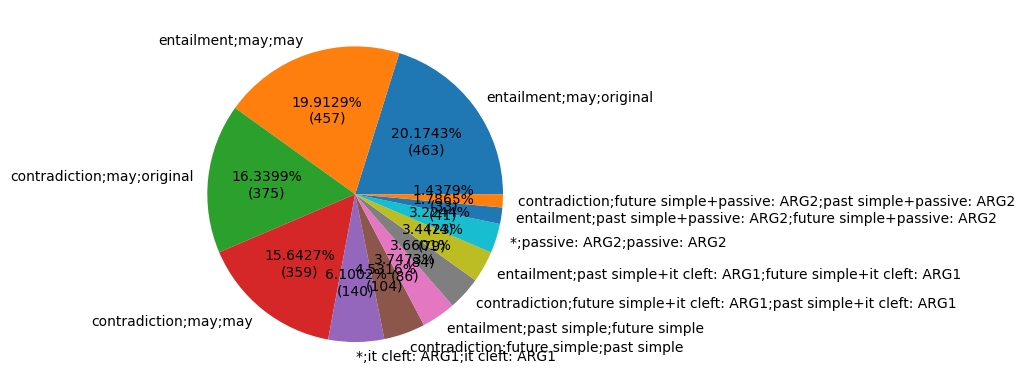

In [17]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

import matplotlib.pyplot as plt

values = df_error['type']
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False);

## Finetune on Contrast Training Dataset

In [ ]:
# python3 run.py --do_train --task nli --dataset contrast/train.jsonl --output_dir ./trained_model/  --model trained_model/checkpoint-206000

In [ ]:
# python3 run.py --do_eval --task nli --dataset snli --model ./trained_model/checkpoint-finetune-contrast   --output_dir ./eval_output/snli/
# python3 run.py --do_eval --task nli --dataset contrast/validation.jsonl   --model ./trained_model/checkpoint-finetune-contrast   --output_dir ./eval_output/contrast-finetune/

Evaluation results: <br><br>
SNLI: <br>
{'eval_loss': 0.5675817131996155, 'eval_accuracy': 0.8639504313468933, 'eval_runtime': 15.3651, 'eval_samples_per_second': 640.543, 'eval_steps_per_second': 80.117} <br><br>
Contrast: <br>
{'eval_loss': 0.24433456361293793, 'eval_accuracy': 0.940057098865509, 'eval_runtime': 6.8735, 'eval_samples_per_second': 611.623, 'eval_steps_per_second': 76.526}

In [19]:
input_file = 'eval_output/contrast-finetune/eval_predictions.jsonl'
with open(input_file) as f:
    lines = f.read().splitlines()

import pandas as pd
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
import json
df_inter['json_element'].apply(json.loads)
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))
df_error = df_final.loc[df_final['label'] != df_final['predicted_label']].reset_index(drop=True)
df_error

,premise,hypothesis,label,type,predicted_scores,predicted_label
0,While his companion plays in the doorway nearb...,A bench is straddled by a kid.,1,*;passive: ARG2;passive: ARG2,"[3.1041717529296875, -0.605858325958252, -3.14...",0
1,While his companion plays nearby in the doorwa...,It is a kid who straddles a bench.,1,*;it cleft: ARG1;it cleft: ARG1,"[3.401031970977783, -0.5526721477508545, -3.69...",0
2,It is the tiny girl dressed in a butterfly bal...,It is a small girl who dances in the nutcracker.,1,*;it cleft: ARG1;it cleft: ARG1,"[2.7721660137176514, -0.7676103711128235, -2.4...",0
3,A ropes bridge is crossed by a woman wearing a...,A ropes bridge is crossed by a woman wearing a...,2,*;passive: ARG2;passive: ARG2,"[-4.618812084197998, 2.5378098487854004, 0.831...",1
4,It is six workers who are working on the train...,It is six workers who are completing repair on...,1,*;it cleft: ARG1;it cleft: ARG1,"[3.141563653945923, -0.1595025658607483, -3.68...",0
...,...,...,...,...,...,...
247,"While a tv plays in the background, a group of...",A fun game on the floor of a living room is pl...,0,*;passive: ARG2;passive: ARG2,"[0.5593045353889465, 2.1466410160064697, -3.47...",1
248,"While a tv plays in the background, it is a gr...",It is a group of people who plays a fun game o...,0,*;it cleft: ARG1;it cleft: ARG1,"[-0.2169918715953827, 2.7966113090515137, -3.4...",1
249,A person doing a strange trick on her head is ...,A card trick is done by a boy.,2,*;passive: ARG2;passive: ARG2,"[-2.1133615970611572, 3.2837302684783936, -2.1...",1
250,It is a group of onlookers who glances at a pe...,It is a boy who does a card trick.,2,*;it cleft: ARG1;it cleft: ARG1,"[-3.6635732650756836, 1.7190015316009521, 1.02...",1


67.46031641960144
32.53968358039856


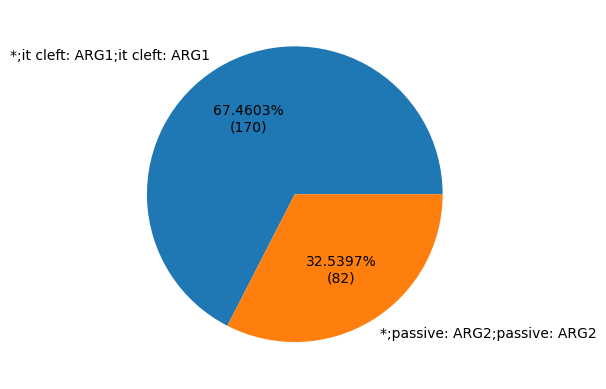

In [20]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

import matplotlib.pyplot as plt

values = df_error['type']
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=False);

### Compare with Pretrained Model

In [22]:
from tabulate import tabulate
# create data
data = [["Pretrain", 89.47, 45.41], 
        ["Contrast-Finetune", 86.40, 94.00]]
  
#define header names
col_names = ["Model", "accuracy on SNLI", "accuracy on SNLI-contrast"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════╤════════════════════╤═════════════════════════════╕
│ Model             │   accuracy on SNLI │   accuracy on SNLI-contrast │
╞═══════════════════╪════════════════════╪═════════════════════════════╡
│ Pretrain          │              89.47 │                       45.41 │
├───────────────────┼────────────────────┼─────────────────────────────┤
│ Contrast-Finetune │              86.4  │                       94    │
╘═══════════════════╧════════════════════╧═════════════════════════════╛


## Additional Work:
- Generate Adversarial Dataset and Finetune (risk)
- Blend Original Training Dataset, Contrast Dataset, Adversarial Dataset, and Finetune


In [25]:
import datasets
dataset = datasets.load_dataset('snli')
dataset['train']

import pandas as pd
ori = pd.DataFrame(dataset['train'])
ori

,premise,hypothesis,label
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,1
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",2
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",0
3,Children smiling and waving at camera,They are smiling at their parents,1
4,Children smiling and waving at camera,There are children present,0
...,...,...,...
550147,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',2
550148,Four dirty and barefooted children.,"four homeless children had their shoes stolen,...",1
550149,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...,1
550150,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,2


In [29]:
input_file = 'contrast/train.jsonl'
with open(input_file) as f:
    lines = f.read().splitlines()

import pandas as pd
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
import json
df_inter['json_element'].apply(json.loads)
contrast = pd.json_normalize(df_inter['json_element'].apply(json.loads)).drop(['type'], axis=1)
contrast

,premise,hypothesis,label
0,It is a man who is lying on an air mattress.,It is the man which is asleep.,1
1,Her wind instrument is played by a woman along...,A band is belonged to by the woman.,1
2,It is a woman who plays her wind instrument al...,It is the woman who belongs to a band.,1
3,A girl with a ponytail in a black soccer unifo...,A player will get ready to kick the ball.,1
4,A girl with a ponytail in a black soccer unifo...,A player gets ready to kick the ball.,1
...,...,...,...
189109,Children may play in a water fountain.,The children may be wet.,1
189110,It is children who play in a water fountain.,It is the children who are wet.,0
189111,These may be very well groomed animals.,The animal's fur looked well kept,1
189112,These may be very well groomed animals.,The animal's fur may look well-kept.,1


In [31]:
adversarial = pd.read_json('adversarial/train_data.json')
adversarial

,premise,hypothesis,label
0,A man stands on one leg while lifting the othe...,A man on a beach.,0
1,"A white and brown dog, seaport a bandanna, jum...",a puppy jumps through the air,0
2,A child is doing a somersault on a green lawn ...,A child is performing a handstand.,0
3,A snowboarders doing a trick on the cement on ...,A person is outside.,0
4,the man with his kneecaps held up and another ...,Two people are sitting.,0
...,...,...,...
13180,A woman holding a pink balloon and wearing a f...,a woman stands next to a smiling man,0
13181,A blond girl is looking bored while playing Wa...,The girl is losing the poker game.,1
13182,Thin man in suit standing at a podium in a ban...,A thin man in banquet room is wearing a suit a...,0
13183,A brown dog runs on brown grass.,A terrier running on grass.,0


pd.concat([ori, contrast, adversarial]).sample(frac = 1)

In [36]:
merged = pd.concat([ori, contrast, adversarial]).sample(frac = 1)
output_path = "merged/train.jsonl"

with open(output_path, "w") as f:
    f.write(merged.to_json(orient='records', lines=True))

In [ ]:
# python3 run.py --do_train --task nli --dataset merged/train.jsonl --output_dir ./trained_model/  --model trained_model/checkpoint-pretrain